This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

In [22]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Getting started with neural networks: classification and regression

## Predicting house prices: a regression example

The two previous examples were considered **classification problems**, where the goal was to predict a single discrete label of an input data point. Another common type of machine-learning problem is **regression**, which consists of predicting a continuous value instead of a discrete label: for instance, predicting the temperature tomorrow, given meteorological data; or predicting the time that a software project will take to complete, given its specifications.

### The Boston Housing Price dataset

You’ll attempt to **predict the median price of homes in a given Boston suburb** in the mid-1970s, given data points about the suburb at the time, such as the `crime rate`, the local `property tax rate`, and so on. The dataset you’ll use has an interesting difference from the two previous examples. It has relatively few data points: only $506$, split between $404$ training samples and $102$ test samples. And each feature in the input data (for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between $0$ and $1$; others take values between $1$ and $12$, others between $0$ and $100$, and so on.

**Loading the Boston housing dataset**

In [105]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [106]:
from sklearn.datasets import load_boston

load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [107]:
train_data.shape

(404, 13)

In [108]:
test_data.shape

(102, 13)

In [109]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

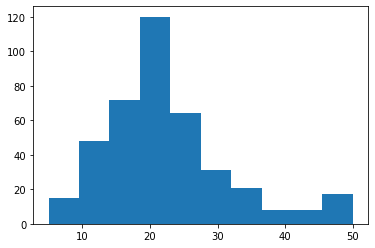

In [110]:
plt.hist(train_targets)

The prices are typically between $\$10,000$ and $\$50,000$. If that sounds cheap, remember that this was the mid-1970s, and these prices aren’t adjusted for inflation.

### Preparing the data

**Normalizing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The model might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do **feature-wise normalization**

Note that the quantities used for normalizing the test data are computed using the **training data**. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

In [111]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

Because so few samples are available, you’ll use a very small model with two intermediate layers, each with $64$ units. In general, the less training data you have, the worse overfitting will be, and using a small model is one way to mitigate overfitting.

**Model definition**

The model ends with a **single unit and no activation** (it will be a linear layer). This is a typical setup for **scalar regression** (a regression where you’re trying to predict a single continuous value). Applying an activation function would constrain the range the output can take; for instance, if you applied a `sigmoid` activation function to the last layer, the model could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the model is free to learn to predict values in any range.

Note that you compile the model with the `mse` loss function — mean squared error, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.

You’re also monitoring a new metric during training: **mean absolute error** (MAE). It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.


In [62]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

To evaluate your model while you keep adjusting its parameters (such as the number of epochs used for training), you could split the data into a training set and a validation set, as you did in the previous examples. But because you have so few data points, the validation set would end up being very small (for instance, about 100 examples). As a consequence, the validation scores might change a lot depending on which data points you chose to use for validation and which you chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model.

The best practice in such situations is to use **K-fold cross-validation** (see figure 4.8). It consists of splitting the available data into $K$ partitions (typically K = 4 or 5), instantiating $K$ identical models, and training each one on $K – 1$ partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the $K$ validation scores obtained. In terms of code, this is straightforward.

![](https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/3-fold-cross-validation.png)

**K-fold validation**

In [112]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [115]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=k)
all_scores = []
for train_index, val_index in kf.split(train_data, train_targets):
    val_data, val_targets = train_data[val_index], train_targets[val_index]
    partial_train_data, partial_train_targets = train_data[train_index], train_targets[train_index]
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)   
    
    

In [116]:
all_scores

[2.066729784011841, 2.31536602973938, 2.6480789184570312, 2.422050952911377]

In [117]:
np.mean(all_scores)

2.3630564212799072

**Saving the validation logs at each fold**

In [118]:
num_epochs = 500

all_mae_histories = []
for train_index, val_index in kf.split(train_data):
    val_data, val_targets = train_data[val_index], train_targets[val_index]
    partial_train_data, partial_train_targets = train_data[train_index], train_targets[train_index]
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [119]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

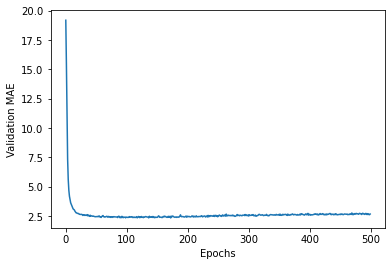

In [120]:
plt.plot(average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

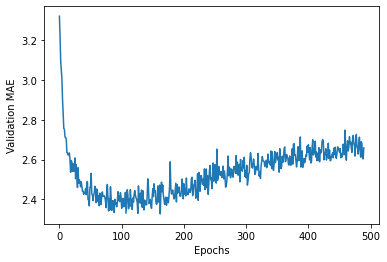

In [121]:
truncated_mae_history = average_mae_history[10:]
plt.plot(truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

Once you’re finished tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the intermediate layers), you can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.

In [122]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 14.7815 - mae: 2.5467


In [123]:
test_mae_score

2.5467073917388916

You’re still off by about $\$2,500$.

### Generating predictions on new data

In [124]:
predictions = model.predict(test_data)
predictions[0]

array([8.31038], dtype=float32)

### Wrapping up

Here’s what you should take away from this scalar regression example:

- Regression is done using different loss functions than what we used for classification. **Mean squared error** (MSE) is a loss function commonly used for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is **mean absolute error** (MAE).
- When features in the input data have values in different ranges, each feature should be **scaled independently** as a preprocessing step.
- When there is little data available, using **K-fold cross-validation** is a great way to reliably evaluate a model.
- When little training data is available, it’s preferable to use a small model with **few intermediate layers** (typically only one or two), in order to avoid severe overfitting.
